In [522]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import os
import gmaps
from scipy.stats import linregress
from citipy import citipy

#from api_keys import g_key
#from api_keys import weather_api_key
#gmaps.configure(api_key=g_key)

start_state = "01"
url = "https://api.census.gov/data/2019/pep/population?get=POP&for=state:"
map_url = "https://maps.googleapis.com/maps/api/geocode/json?"
#map_query_url = f"{map_url}&key={g_key}&address="
query = f'{url}{start_state}'

# Input File (CSV)
input_data_file_city = "Data/annual_aqi_by_cbsa_2019.csv"
input_data_file_county = "Data/annual_aqi_by_county_2019.csv"
aqi_city = pd.read_csv(input_data_file_city)
aqi_county = pd.read_csv(input_data_file_county)

#map_query_url = f"{map_url}&key={g_key}&address="


https://api.census.gov/data/2019/pep/population?get=POP&for=state:01


In [524]:
response = requests.get(query)
response_json = response.json()
state_counts = []
state_count = len(states_updated)
for x in range(1, 57):
    str(x).zfill(2)
    state_counts.append(str(x).zfill(2))


In [440]:
pop_list = []
state_counts = state_counts
state_counts = [e for e in state_counts if e not in ('03', '07','14','43','52','11')]
for state in state_counts:
    population = requests.get(census_url + state).json()
    print(f'The Population of {state} is {population[1][0]}')
    pop_list.append(population[1][0])

The Population of 01 is 4903185
The Population of 02 is 731545
The Population of 04 is 7278717
The Population of 05 is 3017804
The Population of 06 is 39512223
The Population of 08 is 5758736
The Population of 09 is 3565287
The Population of 10 is 973764
The Population of 12 is 21477737
The Population of 13 is 10617423
The Population of 15 is 1415872
The Population of 16 is 1787065
The Population of 17 is 12671821
The Population of 18 is 6732219
The Population of 19 is 3155070
The Population of 20 is 2913314
The Population of 21 is 4467673
The Population of 22 is 4648794
The Population of 23 is 1344212
The Population of 24 is 6045680
The Population of 25 is 6892503
The Population of 26 is 9986857
The Population of 27 is 5639632
The Population of 28 is 2976149
The Population of 29 is 6137428
The Population of 30 is 1068778
The Population of 31 is 1934408
The Population of 32 is 3080156
The Population of 33 is 1359711
The Population of 34 is 8882190
The Population of 35 is 2096829
The Po

In [563]:
# Create temp table grouped by state
aqi_county_groups = aqi_county.set_index('State').groupby(['State'])

# Get Average data by State
good_days = aqi_county_groups["Good Days"].mean()
moderate_days = aqi_county_groups["Moderate Days"].mean()
unhealthy_days = aqi_county_groups["Unhealthy Days"].mean()
very_unhealthy_days = aqi_county_groups["Very Unhealthy Days"].mean()
hazardous_days = aqi_county_groups["Hazardous Days"].mean()
days_co = aqi_county_groups["Days CO"].mean()
days_no2 = aqi_county_groups["Days NO2"].mean()
days_ozone = aqi_county_groups["Days Ozone"].mean()
days_so2 = aqi_county_groups["Days SO2"].mean()

# Create DataFrame
aqi_state_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2                                  
                             })

states_updated = aqi_state_summary.drop(['Puerto Rico', 'Country Of Mexico', 'District Of Columbia','Virgin Islands'], axis=0, inplace=True)


In [564]:
# Top 5 States with Good Days
aqi_state_summary.sort_values(by='Good Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Maine,257.600000,13.300000,0.1,0.0,0.0,0.300000,5.000000,209.400000,0.000000
North Dakota,250.000000,22.500000,0.1,0.0,0.0,0.100000,2.000000,221.000000,5.700000
New York,237.000000,22.903226,0.0,0.0,0.0,0.258065,3.709677,179.419355,27.258065
Massachusetts,215.538462,25.153846,0.0,0.0,0.0,0.153846,4.923077,192.923077,0.000000
Mississippi,211.300000,42.300000,0.0,0.0,0.0,0.100000,0.100000,144.300000,0.000000


In [565]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Hazardous Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
New Mexico,133.818182,69.909091,0.272727,0.181818,0.272727,0.000000,0.818182,161.727273,0.090909
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736
Colorado,131.440000,54.120000,0.080000,0.000000,0.040000,0.320000,3.920000,140.520000,0.120000
Alabama,142.687500,32.937500,0.062500,0.000000,0.000000,0.062500,0.062500,105.187500,4.625000


In [566]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Utah,192.357143,75.357143,0.571429,0.071429,0.0,0.214286,9.928571,243.357143,0.071429
Delaware,208.333333,64.000000,0.000000,0.000000,0.0,0.333333,1.333333,223.333333,0.000000
North Dakota,250.000000,22.500000,0.100000,0.000000,0.0,0.100000,2.000000,221.000000,5.700000
Maine,257.600000,13.300000,0.100000,0.000000,0.0,0.300000,5.000000,209.400000,0.000000
Massachusetts,215.538462,25.153846,0.000000,0.000000,0.0,0.153846,4.923077,192.923077,0.000000


In [567]:
# Top 5 States with higher than normal Ozone
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Utah,192.357143,75.357143,0.571429,0.071429,0.0,0.214286,9.928571,243.357143,0.071429
Delaware,208.333333,64.000000,0.000000,0.000000,0.0,0.333333,1.333333,223.333333,0.000000
North Dakota,250.000000,22.500000,0.100000,0.000000,0.0,0.100000,2.000000,221.000000,5.700000
Maine,257.600000,13.300000,0.100000,0.000000,0.0,0.300000,5.000000,209.400000,0.000000
Massachusetts,215.538462,25.153846,0.000000,0.000000,0.0,0.153846,4.923077,192.923077,0.000000


In [556]:
# City based data analysis
# Data is not collected for all 365 days so an accurate picture cannot be attained with certainty.  
#This data has to be taken into consideration when stating results
data_coverage = []

#Collect city good
good_days_percent = [] 
Unhealthy_Hazardour_percent = []


#collected data percentage 
data_coverage = aqi_city["Days with AQI"] / 365
good_days_percent = aqi_city["Good Days"]/aqi_city["Days with AQI"]

aqi_city["Year Coverage"] = data_coverage
aqi_city["Good Day Percent"] = good_days_percent


df = pd.DataFrame(aqi_city)

In [557]:
df[["city","state"]] = df["CBSA"].str.split(", ",expand=True)
state_df = aqi_county.groupby("State").mean()["90th Percentile AQI"]
state_df_ = pd.DataFrame(state_df)

In [558]:
new_df 
new_df = new_df.set_index(states_updated.index)
states_updated["Population"] = new_df
states_updated['Population'] = states_updated['Population'].astype(int)

y = 258122.01x + -7181262.44


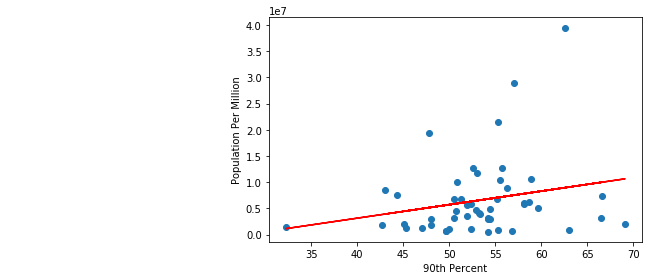

In [559]:
# Create a Scatter Plot for temperature vs latitude
newest_df = pd.merge(state_df, states_updated, on="State")
x_values = newest_df["90th Percentile AQI"]
y_values = newest_df['Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('90th Percent')
plt.ylabel('Population Per Million')
plt.plot(x_values,regress_values,"r-")
plt.tight_layout()
plt.annotate(line_eq, (2,5), fontsize=15,color="red")
print(line_eq);

In [560]:
# Top 5 cities with best air quality 
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
df = pd.DataFrame(coverage)
df = df.sort_values(['Year Coverage','Good Day Percent'], ascending=[False,False]).head()
print(df['CBSA'])

369       Portland-South Portland, ME
124    Des Moines-West Des Moines, IA
376                    Provo-Orem, UT
406                Salt Lake City, UT
31                         Bangor, ME
Name: CBSA, dtype: object


In [561]:
## Build Map Data for State using city data
available_cities = []
state = []
lats = []
lngs = []
medianAQI = []
# loops for creating dataframe columns
print("Pulling City Lat and Lng data..")

for i in range (len(aqi_city['CBSA'])):
    try:
        #handle spaces in city names
        response = requests.get(map_query_url + aqi_city['CBSA'][i].replace(" ","+")).json()

        #gather city data
        available_cities.append(aqi_city['CBSA'][i])
        state.append(aqi_city['CBSA'][i].rsplit(", ")[1])
        
        lat = round(response['results'][0]['geometry']['location']['lat'], 2)
        lng = round(response['results'][0]['geometry']['location']['lng'], 2)
        lats.append(lat)
        lngs.append(lng)

        medianAQI.append(aqi_city['Median AQI'][i])

        #print(aqi_city['CBSA'][i] + ", Median AQI = " + str(aqi_city['Median AQI'][i]), "Lat:" + str(round(lat,2)) 
        #      + ", Lng:" + str(round(lng,2)))
    except Exception:
        print(aqi_city['CBSA'][i] + " not found!")

print("Data Read Completed")

available_city_data = {
    "City":available_cities,
    "Lat":lats,
    "Lng":lngs,
    "AQI": medianAQI
}
map_ready_data = pd.DataFrame(available_city_data)
map_ready_data.head()

Pulling City Lat and Lng data..
Aberdeen, SD not found!
Aberdeen, WA not found!
Adjuntas, PR not found!
Adrian, MI not found!
Akron, OH not found!
Albany, GA not found!
Albany, OR not found!
Albany-Schenectady-Troy, NY not found!
Albuquerque, NM not found!
Alexandria, LA not found!
Allentown-Bethlehem-Easton, PA-NJ not found!
Altoona, PA not found!
Amarillo, TX not found!
Americus, GA not found!
Anchorage, AK not found!
Ann Arbor, MI not found!
Appleton, WI not found!
Ardmore, OK not found!
Arkadelphia, AR not found!
Asheville, NC not found!
Ashtabula, OH not found!
Athens, OH not found!
Athens, TN not found!
Athens-Clarke County, GA not found!
Atlanta-Sandy Springs-Roswell, GA not found!
Atlantic City-Hammonton, NJ not found!
Augusta-Richmond County, GA-SC not found!
Augusta-Waterville, ME not found!
Austin-Round Rock, TX not found!
Bakersfield, CA not found!
Baltimore-Columbia-Towson, MD not found!
Bangor, ME not found!
Baraboo, WI not found!
Barnstable Town, MA not found!
Baton Roug

,City,Lat,Lng,AQI


In [562]:
# Hypothesis: CNN Article on Tue 4/7/2020 showed a heatmap of US with cities that have PM 2.5 higher than 13 micrograms.
# The data was averaged from 2000-2016. Using the data from Annual AQI by CBSA 2019, we want to see if 2019 data shows
# same heatmap as CNN source.  
# Source article URL: https://www.cnn.com/2020/04/07/health/covid-19-air-pollution-risks-wellness/index.html

#AQI Value AQI Category AQI Color (Source: https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf)
#   0 - 50 Good Green
#  51 - 100 Moderate Yellow
# 101 - 150 Unhealthy for Sensitive Groups Orange
# 151 - 200 Unhealthy Red
# 201 - 300 Very Unhealthy Purple
# 301 - 500 Hazardous Maroon

AQI_data = map_ready_data.loc[map_ready_data["90th Percentile AQI"].astype(float) >= 51]
data_df = pd.DataFrame(AQI_data)

location_data = data_df[["Lat","Lng"]]
data = data_df["90th Percentile AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=120,
                              point_radius=1)
fig.add_layer(heatmap)
fig

# Conclusion: 2019 Data below looks similar to the average data from 2000-2016 as shown in the article.  Visually, a case
# can be made that there are more cities with bad air quality in 2019 than average from 2000-2016.
# Souce: https://cdn.cnn.com/cnnnext/dam/assets/200407173521-20200407-covid-19-air-pollution-top-map-exlarge-169.jpg)




KeyError: '90th Percentile AQI'